# Segments

This notebooks explains how to build segments.

In [1]:
%matplotlib notebook
import broadbean as bb
from broadbean.plotting import plotter
import numpy as np

### Introduction

A `Segment` represents a segment of a waveform. 

For initialisation, a `Segment` needs a name, a function to form an array, possibly some arguments for that function, and a duration.

### Allowed functions

For a function to be useable, it must have a call signature of `(dur, SR, *args)` and it must return a numpy array of length `dur*SR`.

### Example

Let us make a sine wave.

In [2]:


def sinewave(dur, SR, amp, freq, offset, phase):
    
    timeax = np.linspace(0, dur, int(dur*SR), endpoint=False)
    signal = amp * np.sin(2 * np.pi * freq * timeax + phase) + offset
    return signal

In [3]:
sinesegment = bb.Segment('sine',
                         sinewave,
                         {'freq': 5e6, 'amp': 1, 'offset': 0, 'phase': 0},
                         duration=1e-6)

<IPython.core.display.Javascript object>


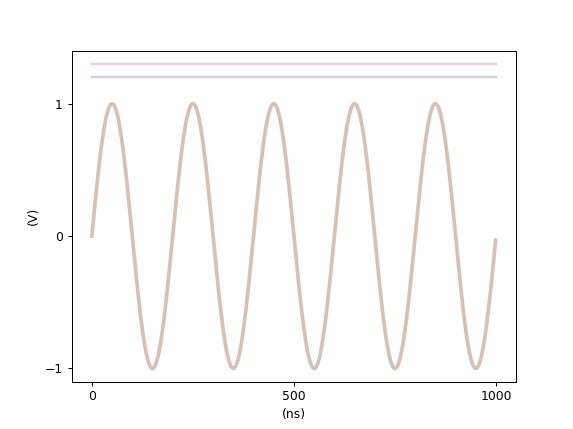

Hello! 


In [4]:
plotter(sinesegment, SR=1e9)

### Varying parameters

The parameters can be directly varied or made to be symbols.

Direct variation is straightforward:

<IPython.core.display.Javascript object>


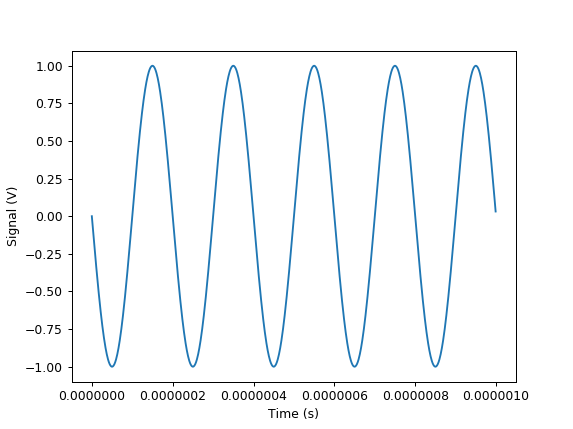

In [5]:
sinesegment.args_dict['phase'] = np.pi
plot_segment(sinesegment, 1e9)

For symbolic variation, one simply provides a string as an argument when initialising the segment. For a single segment, this is not particularly useful, but when used across many segments (think: in a sequence), symbols are of great utility.

In [6]:
sinesegment = bb.Segment('sine',
                         sinewave,
                         {'freq': 'qubit_frequency', 'amp': 1, 'offset': 0, 'phase': 0},
                         duration=1e-6)

cosinesegment = bb.Segment('sine',
                           sinewave,
                           {'freq': 'qubit_frequency', 'amp': 1, 'offset': 0, 'phase': np.pi},
                           duration=1e-6)


When forging and plotting, we simply provide a value for the symbol.

<IPython.core.display.Javascript object>


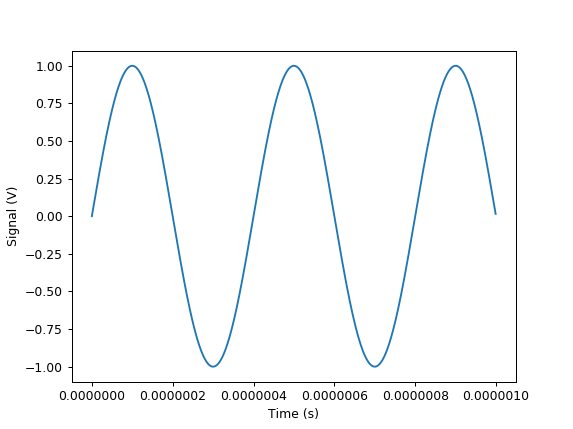

In [7]:
SR = 1e9
qbf = 2.5e6
plot_segment(sinesegment, SR, qubit_frequency=qbf)
    